In [1]:
import pandas as pd
import glob
from collections import defaultdict
from statistics import median
import numpy as np
import pymannkendall as mk
from kneed import KneeLocator
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from gprofiler import GProfiler

In [2]:
def format_func_K(value, tick_number):
    if value % 1000 == 0 and value != 0:
        value = '{:.0f}'.format(value / 1000)
        return str(value) + "K"

In [3]:
def Counting(filename, tpm_thr_min, tpm_thr_max, psi_thr_min, psi_thr_max):
    condensed = open(path + filename)
    tpm_thr_min = tpm_thr_min
    tpm_thr_max = tpm_thr_max
    psi_thr_min = psi_thr_min
    psi_thr_max = psi_thr_max
    
    gene_depth_all_dict = defaultdict(set)
    junction_depth_all_dict = defaultdict(set)
    
    gene_depth_100_dict = defaultdict(set)
    junction_depth_100_dict = defaultdict(set)
    
    gene_depth_dict = defaultdict(set)
    junction_depth_dict = defaultdict(set)

    for line in condensed:
        phenotype, gene, junction, depth, sample_n, psi, tpm = line.split()
        if phenotype != 'Phenotype':
            if float(psi) >= psi_thr_min and float(psi) < psi_thr_max:
                if float(tpm) >= tpm_thr_min and float(tpm) < tpm_thr_max:
                    if int(sample_n) == 100:
                        gene_depth_100_dict[int(depth[:-1])].add(gene)
                        junction_depth_100_dict[int(depth[:-1])].add(junction)
                    else:
                        junction_depth_dict[int(depth[:-1])].add(junction)
                    gene_depth_all_dict[int(depth[:-1])].add(gene)
                    junction_depth_all_dict[int(depth[:-1])].add(junction)
                
                
    condensed.close()
    
    
    for k in gene_depth_all_dict.keys():
        gene_depth_dict[k] = gene_depth_all_dict[k] - gene_depth_100_dict[k]
    
    x = []
    gene_all_y = []
    gene_100_y = []
    gene_y = []
    
    junction_all_y = []
    junction_100_y = []
    junction_y = []
    
    for k, v in sorted(gene_depth_all_dict.items()):
        x.append(k)
        gene_all_y.append(len(v))
    
    for k, v in sorted(gene_depth_100_dict.items()):
        gene_100_y.append(len(v))
    
    for k, v in sorted(gene_depth_dict.items()):
        gene_y.append(len(v))
    
    
    for k, v in sorted(junction_depth_all_dict.items()):
        junction_all_y.append(len(v))
    
    for k, v in sorted(junction_depth_100_dict.items()):
        junction_100_y.append(len(v))
    
    for k, v in sorted(junction_depth_dict.items()):
        junction_y.append(len(v))

    return(x, gene_all_y, gene_100_y, gene_y, junction_all_y, junction_100_y, junction_y)


In [ ]:
def genelistExtraction(filename, tpm_thr_min, tpm_thr_max, psi_thr_min, psi_thr_max, seq_depth, typ):
    condensed = open(path + filename)
    tpm_thr_min = tpm_thr_min
    tpm_thr_max = tpm_thr_max
    psi_thr_min = psi_thr_min
    psi_thr_max = psi_thr_max
    
    gene_depth_all_dict = defaultdict(set)
    junction_depth_all_dict = defaultdict(set)
    
    gene_depth_100_dict = defaultdict(set)
    junction_depth_100_dict = defaultdict(set)
    
    gene_depth_dict = defaultdict(set)
    junction_depth_dict = defaultdict(set)

    for line in condensed:
        phenotype, gene, junction, depth, sample_n, psi, tpm = line.split()
        if phenotype != 'Phenotype':
            if float(psi) >= psi_thr_min and float(psi) < psi_thr_max:
                if float(tpm) >= tpm_thr_min and float(tpm) < tpm_thr_max:
                    if int(sample_n) == 100:
                        gene_depth_100_dict[int(depth[:-1])].add(gene)
                        junction_depth_100_dict[int(depth[:-1])].add(junction)
                    else:
                        junction_depth_dict[int(depth[:-1])].add(junction)
                    gene_depth_all_dict[int(depth[:-1])].add(gene)
                    junction_depth_all_dict[int(depth[:-1])].add(junction)
                
                
    condensed.close()
    
    
    if typ == 'genes_100':
        for i in gene_depth_100_dict[seq_depth]:
            print(i)
            
    if typ == 'genes_all':
        for i in gene_depth_all_dict[seq_depth]:
            print(i) 

    if typ == 'junctions_100':
        for i in junction_depth_100_dict[seq_depth]:
            print(i)
            
    if typ == 'junctions_all':
        for i in junction_depth_all_dict[seq_depth]:
            print(i) 
  
    return()


In [32]:
#Visualisation
def Plotting(plot_title, gene_100_y, gene_y, tpm_thr_min, tpm_thr_max, max_y):
   
    fig, ax = plt.subplots(figsize=(15, 10))
    barWidth = 0.5
    ind1 = np.arange(6, step=1) #6 for adipose and DCM;  4 for hypothalamus
    p1_1 = plt.bar(ind1, gene_100_y, width=barWidth-0.1, color="#1E88E5")
    p2_1 = plt.bar(ind1, gene_y, bottom=gene_100_y, width=barWidth-0.1, color = '#FFC107')
    
    plt.xticks([r for r in [ 0, 1, 2, 3, 4, 5]], 
           ['50', '100', '150', '200', '250', '300'])#adipose, DCM
    
    #plt.xticks([r for r in [ 0, 1, 2, 3]], 
    #       ['50', '100', '150', '200'])#hypothalamus
    
    plt.legend((p1_1[0], p2_1[0]), ('100', '<100'), fontsize=40, loc='best')
    plt.yticks(fontsize=30)
    plt.xticks(fontsize=30)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func_K))
    plt.ylabel(str(tpm_thr_min) + '<=TPM<' + str(tpm_thr_max), fontsize=40)

#    plt.title(plot_title, fontsize=40)
    plt.ylim(0, max_y)
    plt.show()

In [10]:
path = "/Users/olgatsoy/Work/Sys_CARE/Downsampling/Revision_1/Revision_1_clean/Files/Figure3"#path to Figure 3 summary files

ADIPOSE

In [ ]:
phenotype = "adipose_1" #adipose_1; adipose_2

In [38]:
file = '/adipose_1_summary.tsv' #adipose_1_summary.tsv
x, one_gene_all_y, one_gene_100_y, one_gene_y, one_junction_all_y, one_junction_100_y, one_junction_y = Counting(file, 0, 0.1, 0.05, 0.95)
x, two_gene_all_y, two_gene_100_y, two_gene_y, two_junction_all_y, two_junction_100_y, two_junction_y = Counting(file, 0.1, 0.5, 0.05, 0.95)
x, three_gene_all_y, three_gene_100_y, three_gene_y, three_junction_all_y, three_junction_100_y, three_junction_y = Counting(file, 0.5, 1, 0.05, 0.95)
x, four_gene_all_y, four_gene_100_y, four_gene_y, four_junction_all_y, four_junction_100_y, four_junction_y = Counting(file, 1, 10, 0.05, 0.95)
x, five_gene_all_y, five_gene_100_y, five_gene_y, five_junction_all_y, five_junction_100_y, five_junction_y = Counting(file, 10, float('inf'), 0.05, 0.95)
x, six_gene_all_y, six_gene_100_y, six_gene_y, six_junction_all_y, six_junction_100_y, six_junction_y = Counting(file, 1, float('inf'), 0.05, 0.95)

In [40]:
three_junction_100_y

[2018, 3807, 5087, 6044, 6885, 7675]

In [ ]:
file = 'adipose_1_summary.tsv' #adipose_1_summary.tsv
genelistExtraction(file, 0, 0.1, 0.05, 0.95, 100, 'junctions_all')
#filename, tpm_thr_min, tpm_thr_max, psi_thr_min, psi_thr_max, seq_depth, typ
#seq_depth - 50,100,150,200,250,300
#typ - genes_all, genes_100, junctions_100, junctions_all

In [ ]:
for i in (one_gene_all_y, two_gene_all_y, three_gene_all_y, four_gene_all_y, five_gene_all_y, six_gene_all_y):
    result = mk.original_test(i)
    print('\n')
    print(result)

In [ ]:
for i in (one_gene_100_y, two_gene_100_y, three_gene_100_y, four_gene_100_y, five_gene_100_y, six_gene_100_y):
    result = mk.original_test(i)
    print('\n')
    print(result)

In [ ]:
for i in (one_junction_all_y, two_junction_all_y, three_junction_all_y, four_junction_all_y, five_junction_all_y, six_junction_all_y):
    result = mk.original_test(i)
    print('\n')
    print(result)

In [ ]:
for i in (one_junction_100_y, two_junction_100_y, three_junction_100_y, four_junction_100_y, five_junction_100_y, six_junction_100_y):
    result = mk.original_test(i)
    print('\n')
    print(result)

In [30]:
#Parameters for genes
tpm_thr_min = 1
tpm_thr_max = float('inf')
y_max = max(max(one_gene_all_y), max(two_gene_all_y), max(three_gene_all_y), max(four_gene_all_y), max(five_gene_all_y), max(six_gene_all_y))

if tpm_thr_min == 0:
    bottom = one_gene_100_y
    top = one_gene_y
    together = one_gene_all_y
    exp_level = 'one'

if tpm_thr_min == 0.1:
    bottom = two_gene_100_y
    top = two_gene_y
    together = two_gene_all_y
    exp_level = 'two'
    
if tpm_thr_min == 0.5:
    bottom = three_gene_100_y
    top = three_gene_y
    together = three_gene_all_y
    exp_level = 'three'
    
if tpm_thr_min == 1 and tpm_thr_max == 10:
    bottom = four_gene_100_y
    top = four_gene_y
    together = four_gene_all_y
    exp_level = 'four'
    
if tpm_thr_min == 10:
    bottom = five_gene_100_y
    top = five_gene_y
    together = five_gene_all_y
    exp_level = 'five'
    
if tpm_thr_min == 1 and tpm_thr_max == float('inf'):
    bottom = six_gene_100_y
    top = six_gene_y
    together = six_gene_all_y
    exp_level = 'six'


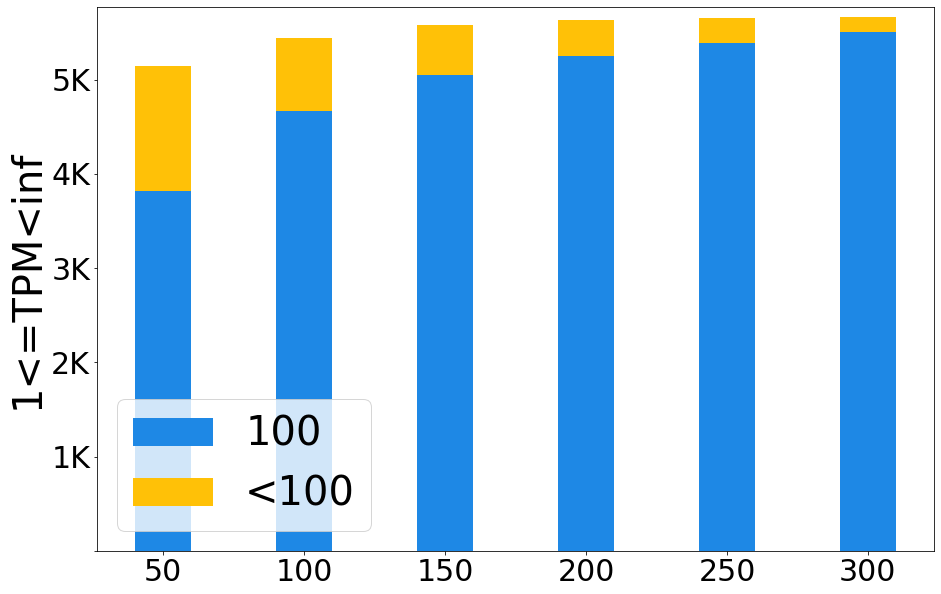

In [33]:
Plotting('Adipose (pre-treatment)', bottom, top, tpm_thr_min, tpm_thr_max,  y_max + 100)

In [ ]:
kneedle = KneeLocator(x, together, curve='concave', direction='increasing') 
print(kneedle.knee)
print(kneedle.elbow)
kneedle.plot_knee(title='All', ylim=y_max + 100, figsize=(10, 10))

In [ ]:
kneedle = KneeLocator(x, bottom, curve='concave', direction='increasing') 
print(kneedle.knee)
print(kneedle.elbow)
kneedle.plot_knee(title='In 100 samples', ylim = y_max + 100, figsize=(10, 10))

In [36]:
#Parameters
tpm_thr_min = 0.5
tpm_thr_max = 1#float('inf')
y_max = max(max(one_junction_all_y), max(two_junction_all_y), max(three_junction_all_y), max(four_junction_all_y), max(five_junction_all_y), max(six_junction_all_y))

if tpm_thr_min == 0:
    bottom = one_junction_100_y
    top = one_junction_y
    together = one_junction_all_y
    exp_level = 'one'

if tpm_thr_min == 0.1:
    bottom = two_junction_100_y
    top = two_junction_y
    together = two_junction_all_y
    exp_level = 'two'
    
if tpm_thr_min == 0.5:
    bottom = three_junction_100_y
    top = three_junction_y
    together = three_junction_all_y
    exp_level = 'three'
    
if tpm_thr_min == 1 and tpm_thr_max == 10:
    bottom = four_junction_100_y
    top = four_junction_y
    together = four_junction_all_y
    exp_level = 'four'
    
if tpm_thr_min == 10:
    bottom = five_junction_100_y
    top = five_junction_y
    together = five_junction_all_y
    exp_level = 'five'
    
if tpm_thr_min == 1 and tpm_thr_max == float('inf'):
    bottom = six_junction_100_y
    top = six_junction_y
    together = six_junction_all_y
    exp_level = 'six'


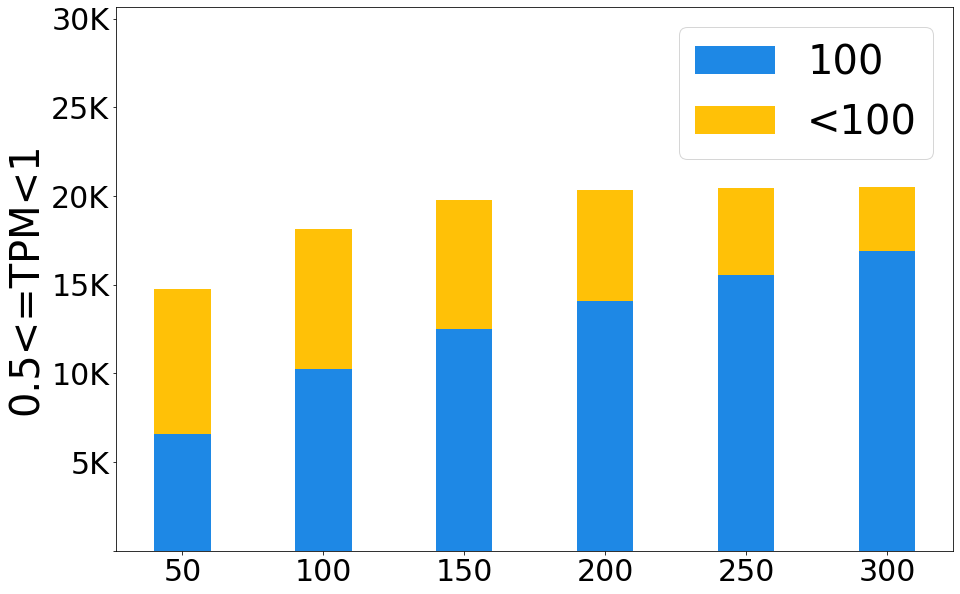

In [37]:
Plotting('Adipose (pre-treatment)', bottom, top, tpm_thr_min, tpm_thr_max, y_max + 100)

In [ ]:
kneedle = KneeLocator(x, together, curve='concave', direction='increasing') 
print(kneedle.knee)
print(kneedle.elbow)
kneedle.plot_knee(title='All', ylim=y_max + 100, figsize=(10, 10))

In [ ]:
kneedle = KneeLocator(x, bottom, curve='concave', direction='increasing') 
print(kneedle.knee)
print(kneedle.elbow)
kneedle.plot_knee(title='In 100 samples', ylim = y_max + 100, figsize=(10, 10))

HYPOTHALAMUS

In [7]:
file = '/hypothalamus_summary.tsv'
x, one_gene_all_y, one_gene_100_y, one_gene_y, one_junction_all_y, one_junction_100_y, one_junction_y = Counting(file, 0, 0.1, 0.05, 0.95)
x, two_gene_all_y, two_gene_100_y, two_gene_y, two_junction_all_y, two_junction_100_y, two_junction_y = Counting(file, 0.1, 0.5, 0.05, 0.95)
x, three_gene_all_y, three_gene_100_y, three_gene_y, three_junction_all_y, three_junction_100_y, three_junction_y = Counting(file, 0.5, 1, 0.05, 0.95)
x, four_gene_all_y, four_gene_100_y, four_gene_y, four_junction_all_y, four_junction_100_y, four_junction_y = Counting(file, 1, 10, 0.05, 0.95)
x, five_gene_all_y, five_gene_100_y, five_gene_y, five_junction_all_y, five_junction_100_y, five_junction_y = Counting(file, 10, float('inf'), 0.05, 0.95)
x, six_gene_all_y, six_gene_100_y, six_gene_y, six_junction_all_y, six_junction_100_y, six_junction_y = Counting(file, 1, float('inf'), 0.05, 0.95)


In [9]:
one_junction_100_y

[3642, 6416, 8593, 11194]

In [ ]:
genelistExtraction(file, 0, 0.1, 0.05, 0.95, 100, 'junctions_all')
#filename, tpm_thr_min, tpm_thr_max, psi_thr_min, psi_thr_max, seq_depth, typ
#seq_depth - 50,100,150,200
#typ - genes_all, genes_100, junctions_100, junctions_all

In [ ]:
for i in (one_gene_all_y, two_gene_all_y, three_gene_all_y, four_gene_all_y, five_gene_all_y, six_gene_all_y):
    result = mk.original_test(i)
    print('\n')
    print(result)

In [ ]:
for i in (one_gene_100_y, two_gene_100_y, three_gene_100_y, four_gene_100_y, five_gene_100_y, six_gene_100_y):
    result = mk.original_test(i)
    print('\n')
    print(result)

In [ ]:
for i in (one_junction_all_y, two_junction_all_y, three_junction_all_y, four_junction_all_y, five_junction_all_y, six_junction_all_y):
    result = mk.original_test(i)
    print('\n')
    print(result)

In [ ]:
for i in (one_junction_100_y, two_junction_100_y, three_junction_100_y, four_junction_100_y, five_junction_100_y, six_junction_100_y):
    result = mk.original_test(i)
    print('\n')
    print(result)

In [ ]:
#Parameters
tpm_thr_min = 1
tpm_thr_max = float('inf')
y_max = max(max(one_gene_all_y), max(two_gene_all_y), max(three_gene_all_y), max(four_gene_all_y), max(five_gene_all_y), max(six_gene_all_y))

if tpm_thr_min == 0:
    bottom = one_gene_100_y
    top = one_gene_y
    together = one_gene_all_y
    exp_level = 'one'

if tpm_thr_min == 0.1:
    bottom = two_gene_100_y
    top = two_gene_y
    together = two_gene_all_y
    exp_level = 'two'
    
if tpm_thr_min == 0.5:
    bottom = three_gene_100_y
    top = three_gene_y
    together = three_gene_all_y
    exp_level = 'three'
    
if tpm_thr_min == 1 and tpm_thr_max == 10:
    bottom = four_gene_100_y
    top = four_gene_y
    together = four_gene_all_y
    exp_level = 'four'
    
if tpm_thr_min == 10:
    bottom = five_gene_100_y
    top = five_gene_y
    together = five_gene_all_y
    exp_level = 'five'
    
if tpm_thr_min == 1 and tpm_thr_max == float('inf'):
    bottom = six_gene_100_y
    top = six_gene_y
    together = six_gene_all_y
    exp_level = 'six'


In [ ]:
Plotting('Hypothalamus', bottom, top, tpm_thr_min, tpm_thr_max,  y_max+ 100)

In [ ]:
kneedle = KneeLocator(x, together, curve='concave', direction='increasing') 
print(kneedle.knee)
print(kneedle.elbow)
kneedle.plot_knee(title='All', ylim=y_max + 100, figsize=(10, 10))

In [ ]:
kneedle = KneeLocator(x, bottom, curve='concave', direction='increasing') 
print(kneedle.knee)
print(kneedle.elbow)
kneedle.plot_knee(title='In 100 samples', ylim = y_max + 100, figsize=(10, 10))

In [ ]:
#Parameters
tpm_thr_min = 1
tpm_thr_max = float('inf')
y_max = max(max(one_junction_all_y), max(two_junction_all_y), max(three_junction_all_y), max(four_junction_all_y), max(five_junction_all_y), max(six_junction_all_y))

if tpm_thr_min == 0:
    bottom = one_junction_100_y
    top = one_junction_y
    together = one_junction_all_y
    exp_level = 'one'

if tpm_thr_min == 0.1:
    bottom = two_junction_100_y
    top = two_junction_y
    together = two_junction_all_y
    exp_level = 'two'
    
if tpm_thr_min == 0.5:
    bottom = three_junction_100_y
    top = three_junction_y
    together = three_junction_all_y
    exp_level = 'three'
    
if tpm_thr_min == 1 and tpm_thr_max == 10:
    bottom = four_junction_100_y
    top = four_junction_y
    together = four_junction_all_y
    exp_level = 'four'
    
if tpm_thr_min == 10:
    bottom = five_junction_100_y
    top = five_junction_y
    together = five_junction_all_y
    exp_level = 'five'
    
if tpm_thr_min == 1 and tpm_thr_max == float('inf'):
    bottom = six_junction_100_y
    top = six_junction_y
    together = six_junction_all_y
    exp_level = 'six'


In [ ]:
Plotting('Hypothalamus', bottom, top, tpm_thr_min, tpm_thr_max, y_max + 100)

In [ ]:
kneedle = KneeLocator(x, together, curve='concave', direction='increasing') 
print(kneedle.knee)
print(kneedle.elbow)
kneedle.plot_knee(title='All', ylim=y_max + 100, figsize=(10, 10))

In [ ]:
kneedle = KneeLocator(x, bottom, curve='concave', direction='increasing') 
print(kneedle.knee)
print(kneedle.elbow)
kneedle.plot_knee(title='In 100 samples', ylim = y_max + 100, figsize=(10, 10))

DCM

In [ ]:
phenotype = 'J26675'#J26675, J26676, J26677. J26678

In [ ]:
tpm_thr_min = 10
tpm_thr_max = float('inf')
d, together_gene_1, bottom_gene_1, top_gene_1, together_junction_1, bottom_junction_1, top_junction_1 = Counting('/J26675_summary.tsv', tpm_thr_min, tpm_thr_max, 0.05, 0.95)
d, together_gene_2, bottom_gene_2, top_gene_2, together_junction_2, bottom_junction_2, top_junction_2 = Counting('/J26676_summary.tsv', tpm_thr_min, tpm_thr_max, 0.05, 0.95)
d, together_gene_3, bottom_gene_3, top_gene_3, together_junction_3, bottom_junction_3, top_junction_3 = Counting('/J26677_summary.tsv', tpm_thr_min, tpm_thr_max, 0.05, 0.95)
d, together_gene_4, bottom_gene_4, top_gene_4, together_junction_4, bottom_junction_4, top_junction_4 = Counting('/J26678_summary.tsv', tpm_thr_min, tpm_thr_max, 0.05, 0.95)


In [ ]:
print(together_junction_1)
print(together_junction_2)

print(together_junction_3)

print(together_junction_4)


In [ ]:
print(bottom_junction_1)
print(bottom_junction_2)

print(bottom_junction_3)

print(bottom_junction_4)


In [ ]:
file = '/J26675_summary.tsv'
genelistExtraction(file, 0, 0.1, 0.05, 0.95, 100, 'junctions_all')
#filename, tpm_thr_min, tpm_thr_max, psi_thr_min, psi_thr_max, seq_depth, typ
#seq_depth - 50,100,150,200, 250, 300
#typ - genes_all, genes_100, junctions_100, junctions_all

In [ ]:
for i in (together_gene_1, together_gene_2, together_gene_3, together_gene_4):
    result = mk.original_test(i)
    print('\n')
    print(result)

In [ ]:
for i in (bottom_gene_1, bottom_gene_2, bottom_gene_3, bottom_gene_4):
    result = mk.original_test(i)
    print('\n')
    print(result)

In [ ]:
for i in (together_junction_1, together_junction_2, together_junction_3, together_junction_4):
    result = mk.original_test(i)
    print('\n')
    print(result)

In [ ]:
for i in (bottom_junction_1, bottom_junction_2, bottom_junction_3, bottom_junction_4):
    result = mk.original_test(i)
    print('\n')
    print(result)

In [ ]:
#Visualisation
fig, ax = plt.subplots(figsize=(15, 10))
#plt.figure(figsize=(20,10))
y_max = 6000
barWidth = 0.5

ind1 = np.arange(18, step=3)
ind2 = [x + barWidth for x in ind1]
ind3 = [x + barWidth for x in ind2]
ind4 = [x + barWidth for x in ind3]

p1_5 = plt.bar(ind1, bottom_gene_1, width=barWidth-0.1, color="#1E88E5")
p2_5 = plt.bar(ind1, top_gene_1, bottom=bottom_gene_1, width=barWidth-0.1, color = '#FFC107')

p1_6 = plt.bar(ind2, bottom_gene_2, width=barWidth-0.1, color="#1E88E5")
p2_6 = plt.bar(ind2, top_gene_2, bottom=bottom_gene_2, width=barWidth-0.1, color = '#FFC107')

p1_7 = plt.bar(ind3, bottom_gene_3, width=barWidth-0.1, color="#1E88E5")
p2_7 = plt.bar(ind3, top_gene_3, bottom=bottom_gene_3, width=barWidth-0.1, color = '#FFC107')

p1_8 = plt.bar(ind4, bottom_gene_4, width=barWidth-0.1, color="#1E88E5")
p2_8 = plt.bar(ind4, top_gene_4, bottom=bottom_gene_4, width=barWidth-0.1, color = '#FFC107')




plt.xticks([r + barWidth for r in [ 0, 3, 6, 9, 12, 15]], 
           ['50M', '100M', '150M', '200M', '250M', '300M'],
          fontsize=20)
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func_K))

plt.legend((p1_5[0], p2_5[0]), ('100', '<100'), fontsize=40, loc='best')
plt.yticks(fontsize=40)
plt.xticks(fontsize=40)

plt.ylabel(str(tpm_thr_min) + '<=TPM<' + str(tpm_thr_max), fontsize=40)

plt.ylim(0, y_max)

plt.show()

In [ ]:
bottom = []
for i in range(len(bottom_gene_1)):
    bottom.append(median([bottom_gene_1[i], bottom_gene_2[i],bottom_gene_3[i],bottom_gene_4[i]]))
kneedle = KneeLocator(d, bottom, curve='concave', direction='increasing') 
print(kneedle.knee)
print(kneedle.elbow)
kneedle.plot_knee(title='In 100 samples', ylim = y_max + 100, figsize=(10, 10))

In [ ]:
together = []
for i in range(len(together_gene_1)):
    together.append(median([together_gene_1[i], together_gene_2[i],together_gene_3[i],together_gene_4[i]]))
    
kneedle = KneeLocator(d, together, curve='concave', direction='increasing') 
print(kneedle.knee)
print(kneedle.elbow)
kneedle.plot_knee(title='All', ylim = y_max + 100, figsize=(10, 10))

In [ ]:
#Visualisation
fig, ax = plt.subplots(figsize=(15, 10))
y_max = 30000
#plt.figure(figsize=(20,10))
barWidth = 0.5

ind1 = np.arange(18, step=3)
ind2 = [x + barWidth for x in ind1]
ind3 = [x + barWidth for x in ind2]
ind4 = [x + barWidth for x in ind3]

p1_5 = plt.bar(ind1, bottom_junction_1, width=barWidth-0.1, color="#1E88E5")
p2_5 = plt.bar(ind1, top_junction_1, bottom=bottom_junction_1, width=barWidth-0.1, color = '#FFC107')

p1_6 = plt.bar(ind2, bottom_junction_2, width=barWidth-0.1, color="#1E88E5")
p2_6 = plt.bar(ind2, top_junction_2, bottom=bottom_junction_2, width=barWidth-0.1, color = '#FFC107')

p1_7 = plt.bar(ind3, bottom_junction_3, width=barWidth-0.1, color="#1E88E5")
p2_7 = plt.bar(ind3, top_junction_3, bottom=bottom_junction_3, width=barWidth-0.1, color = '#FFC107')

p1_8 = plt.bar(ind4, bottom_junction_4, width=barWidth-0.1, color="#1E88E5")
p2_8 = plt.bar(ind4, top_junction_4, bottom=bottom_junction_4, width=barWidth-0.1, color = '#FFC107')




plt.xticks([r + barWidth for r in [ 0, 3, 6, 9, 12, 15]], 
           ['50M', '100M', '150M', '200M', '250M', '300M'],
          fontsize=20)
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func_K))

plt.legend((p1_5[0], p2_5[0]), ('100', '<100'), fontsize=40, loc='best')
plt.yticks(fontsize=40)
plt.xticks(fontsize=40)

plt.ylabel(str(tpm_thr_min) + '<=TPM<' + str(tpm_thr_max), fontsize=40)

plt.ylim(0, y_max)

plt.show()

In [ ]:
bottom = []
for i in range(len(bottom_junction_1)):
    bottom.append(median([bottom_junction_1[i], bottom_junction_2[i],bottom_junction_3[i],bottom_junction_4[i]]))
kneedle = KneeLocator(d, bottom, curve='concave', direction='increasing') 
print(kneedle.knee)
print(kneedle.elbow)
kneedle.plot_knee(title='In 100 samples', ylim = y_max + 100, figsize=(10, 10))




In [ ]:
together = []
for i in range(len(together_junction_1)):
    together.append(median([together_junction_1[i], together_junction_2[i],together_junction_3[i],together_junction_4[i]]))
    
kneedle = KneeLocator(d, together, curve='concave', direction='increasing') 
print(kneedle.knee)
print(kneedle.elbow)
kneedle.plot_knee(title='All', ylim = y_max + 100, figsize=(10, 10))


